In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

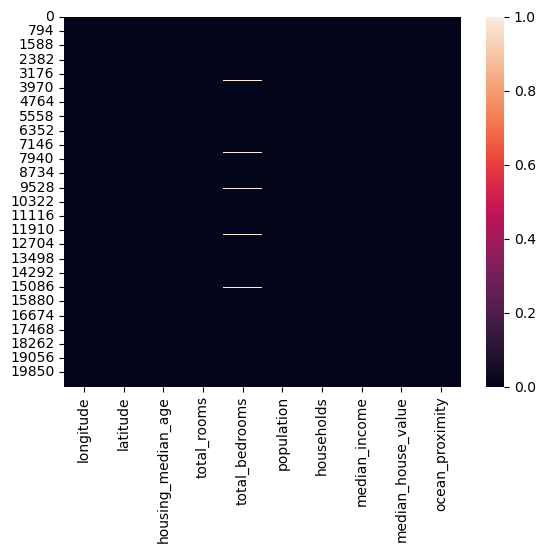

In [7]:
sns.heatmap(df.isnull())
plt.show()

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


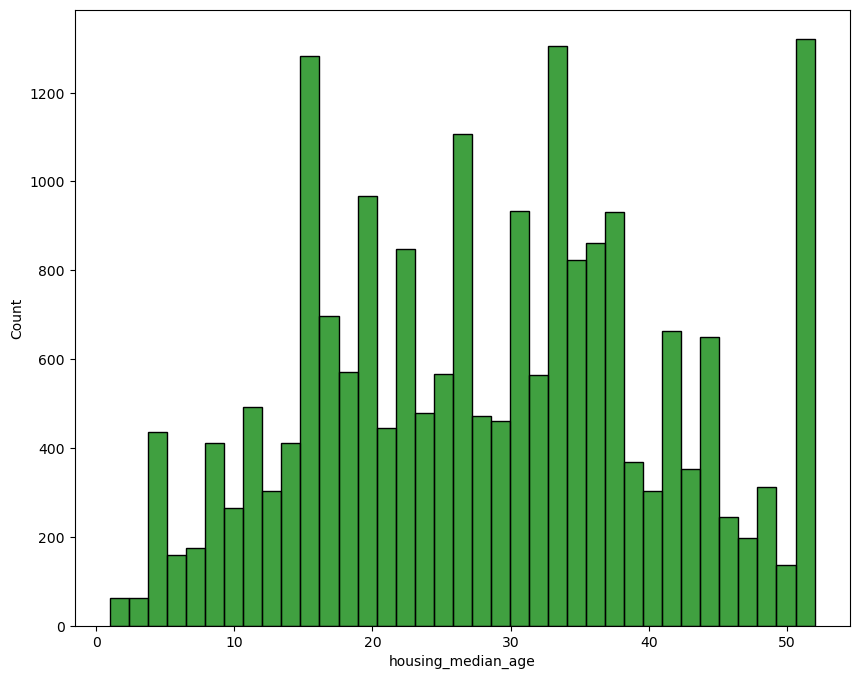

Housing median Age-MIN: 1.0
Housing median Age-MAX: 52.0


In [9]:
plt.figure(figsize=(10,8))
sns.histplot(df['housing_median_age'],color='g')
plt.show()
print('Housing median Age-MIN:',df['housing_median_age'].min())
print('Housing median Age-MAX:',df['housing_median_age'].max())

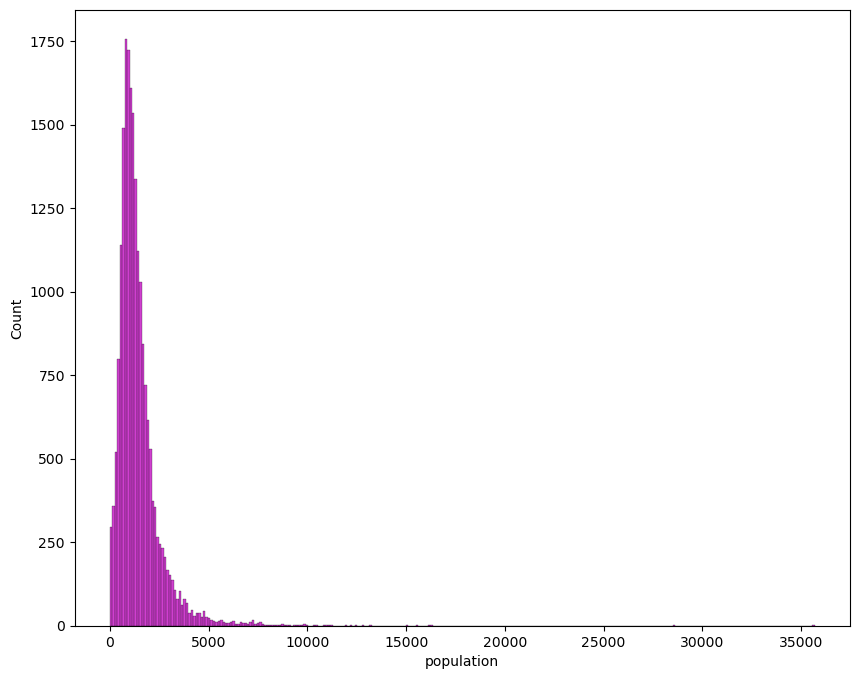

population-MIN: 3.0
population-MAX: 35682.0


In [13]:
plt.figure(figsize=(10,8))
sns.histplot(df['population'],color='m')
plt.show()
print('population-MIN:',df['population'].min())
print('population-MAX:',df['population'].max())

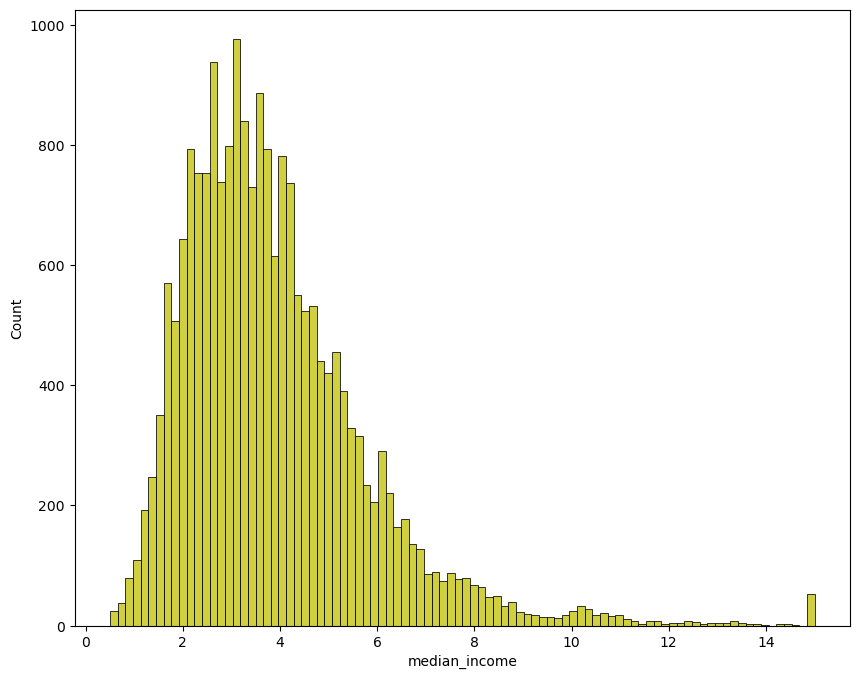

median_income-MIN: 0.4999
median_income-MAX: 15.0001


In [15]:
plt.figure(figsize=(10,8))
sns.histplot(df['median_income'],color='y')
plt.show()
print('median_income-MIN:',df['median_income'].min())
print('median_income-MAX:',df['median_income'].max())

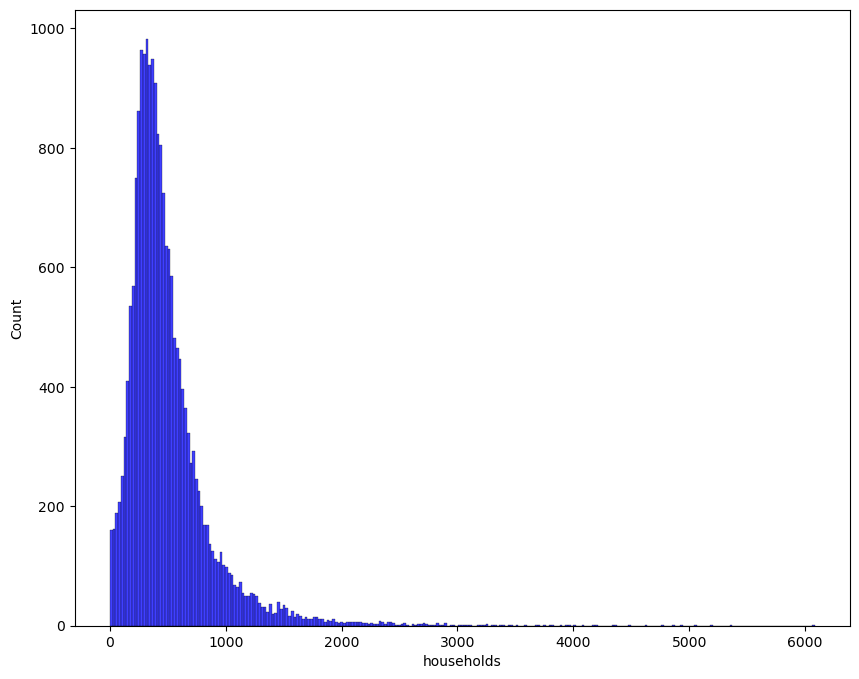

In [16]:
plt.figure(figsize=(10,8))
sns.histplot(df['households'],color='b')
plt.show()

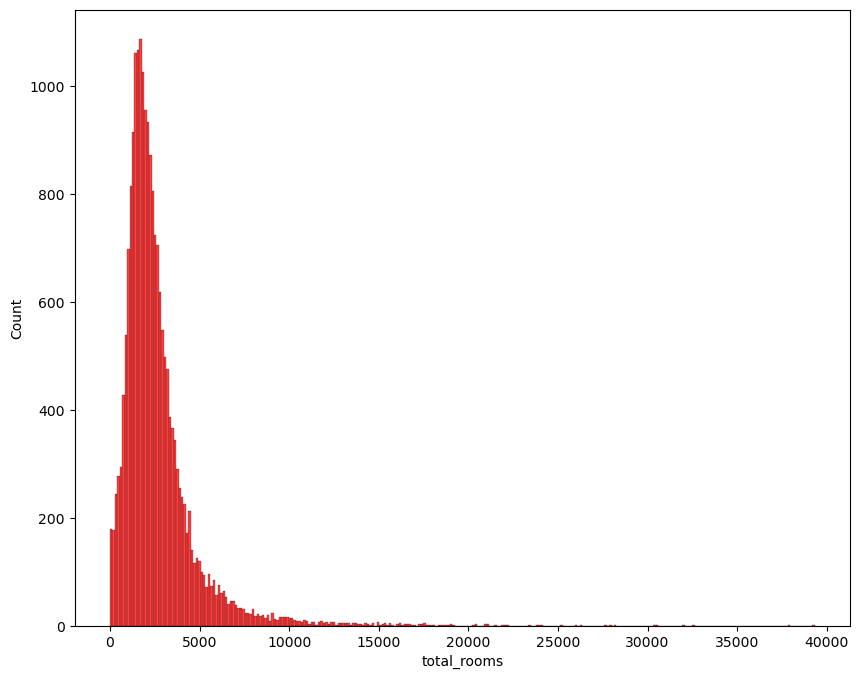

In [17]:
plt.figure(figsize=(10,8))
sns.histplot(df['total_rooms'],color='r')
plt.show()

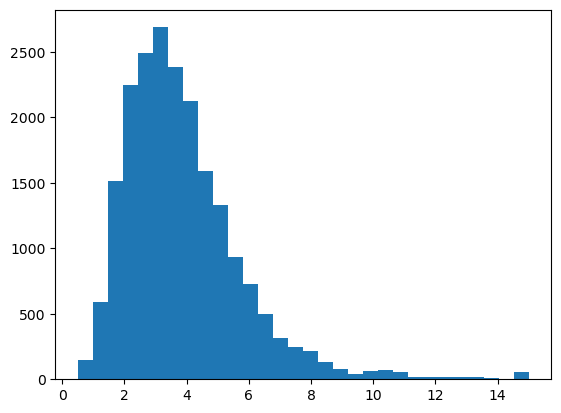

In [22]:
plt.hist(df['median_income'],bins=30)
plt.show()

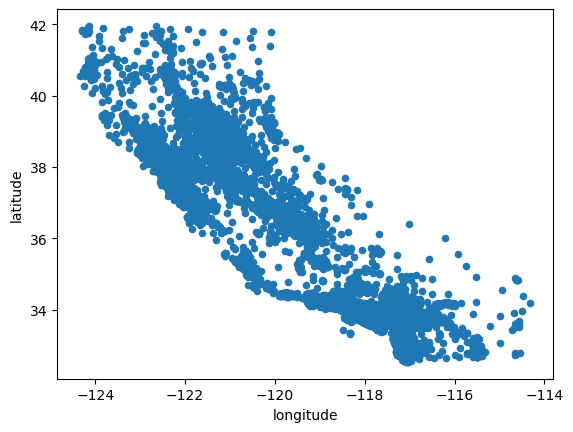

In [23]:
df.plot(kind='scatter',x='longitude',y='latitude')
plt.show()

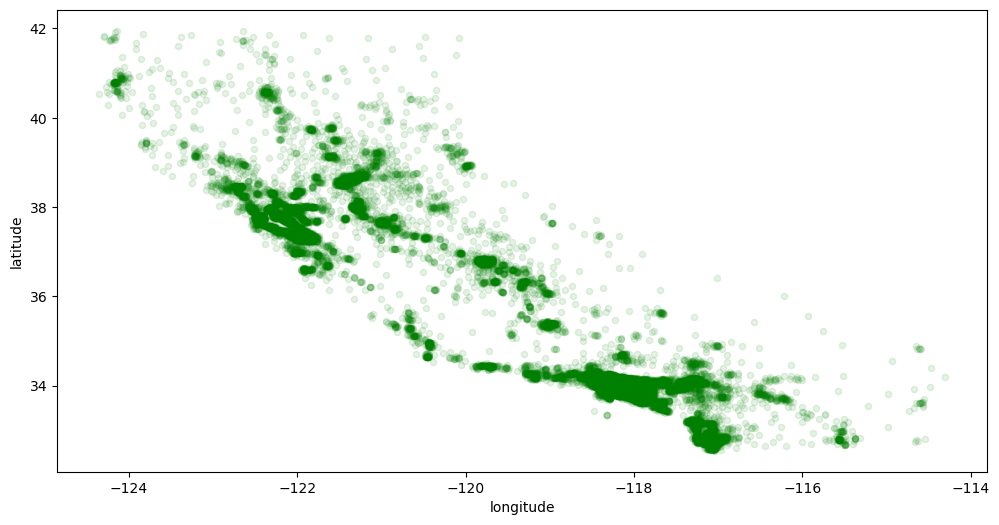

In [26]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,color='g',figsize=(12,6))
plt.show()

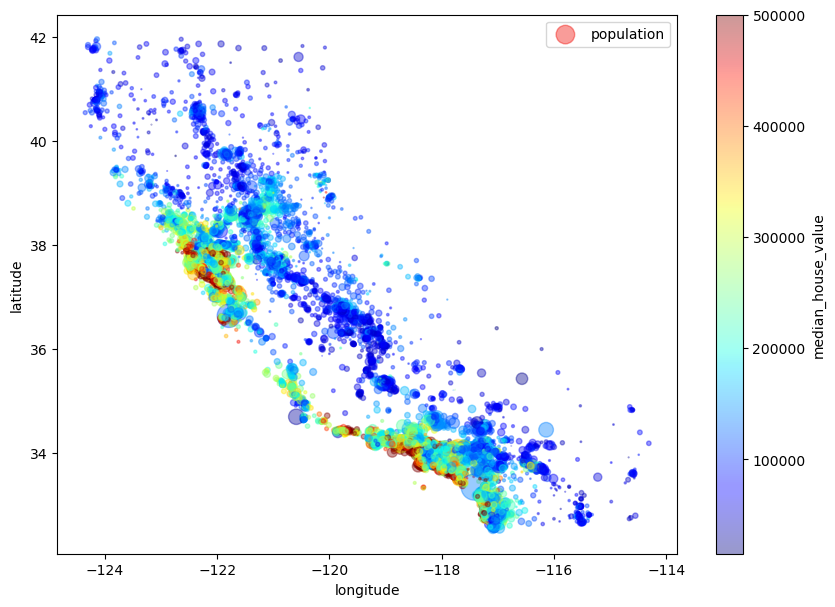

In [28]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
    s=df['population']/100,
    label='population',
    c='median_house_value',
    cmap=plt.get_cmap('jet'), colorbar=True, figsize=(10,7)
    )
plt.legend()
plt.show()

In [32]:
# Select only columns that are integers or floats
numeric_df = df.select_dtypes(include=['number'])

corr_matrix = numeric_df.corr()
corr_df = corr_matrix['median_house_value'].sort_values(ascending=False)
corr_df

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

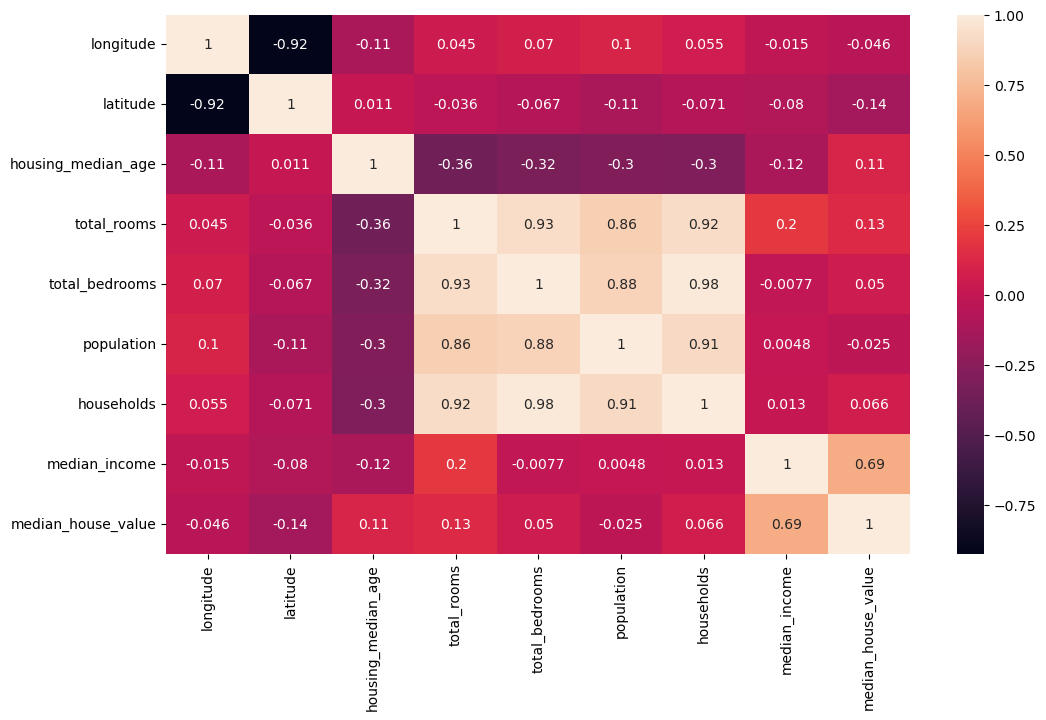

In [33]:
plt.figure(figsize=(12,7))
sns.heatmap(corr_matrix,annot=True)
plt.show()

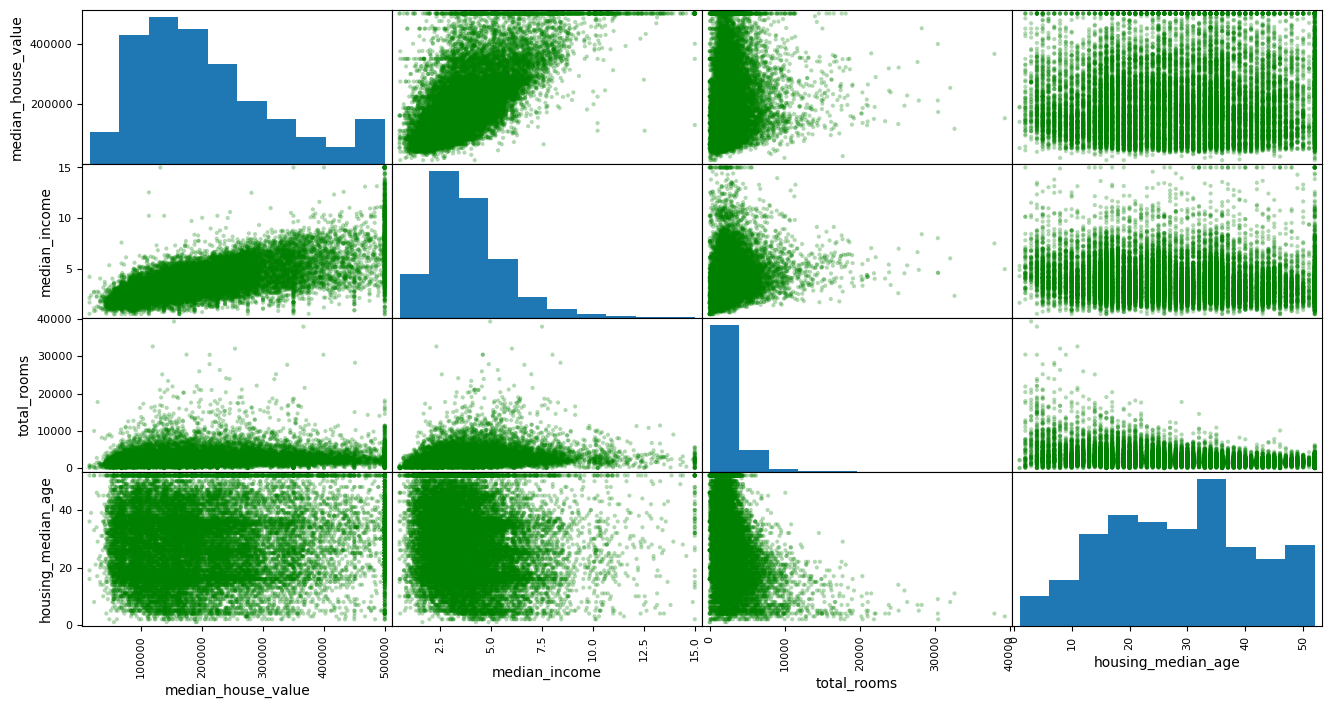

In [35]:
from pandas.plotting import scatter_matrix
attr=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attr],figsize=(16,8),color='g',alpha=0.3)
plt.show()

<Figure size 1600x800 with 0 Axes>

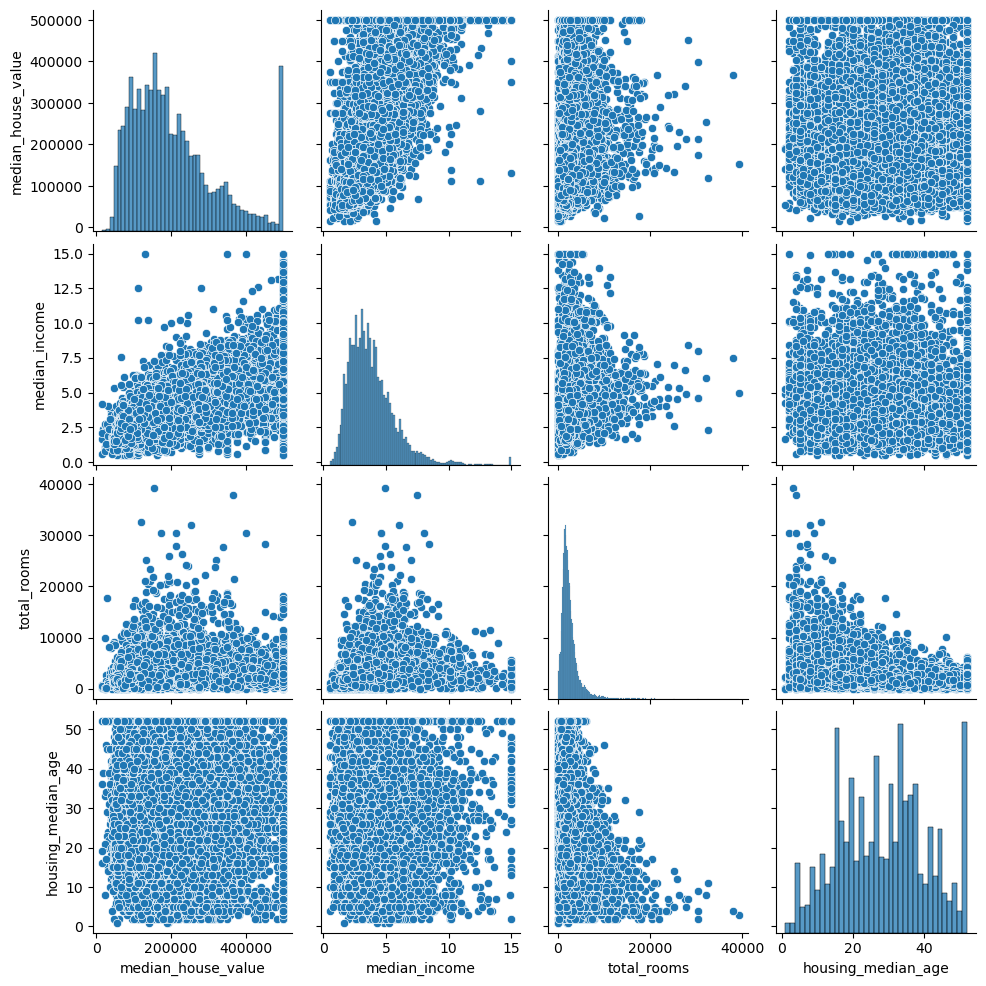

In [36]:
plt.figure(figsize=(16,8))
sns.pairplot(df[attr])
plt.show()

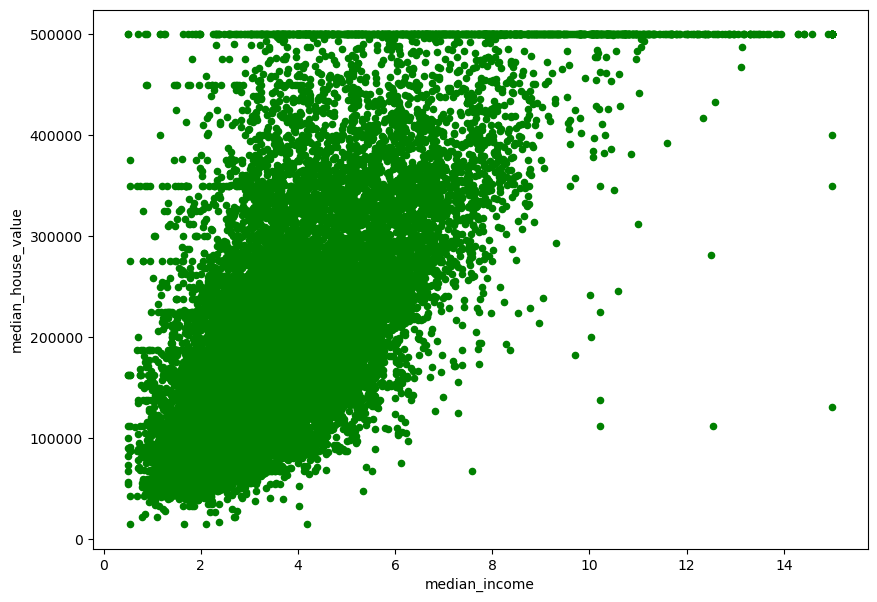

In [42]:
df.plot(kind='scatter',x='median_income',y='median_house_value',c='g',figsize=(10,7))
plt.show()

In [39]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [40]:
pd.get_dummies(df['ocean_proximity']).head(3)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False


In [53]:
dummy=pd.get_dummies(df['ocean_proximity'])
dummy.drop('ISLAND',axis=1,inplace=True)
dummy.head(2)

,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,False,False,True,False
1,False,False,True,False


In [54]:
df.merge(dummy,left_index=True,right_index=True).isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [45]:
df.merge(dummy,left_index=True,right_index=True).isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [55]:
df['<1H OCEAN']= dummy['<1H OCEAN'].values
df['INLAND']=dummy['INLAND'].values
df['NEAR BAY']=dummy['NEAR BAY'].values
df['NEAR OCEAN']=dummy['NEAR OCEAN'].values
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,True,False


In [56]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
<1H OCEAN               0
INLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [73]:
from sklearn.impute import SimpleImputer
train_ft = df.drop(['ocean_proximity','median_house_value'],axis=1)
imputer = SimpleImputer(strategy='median')
train_ft_imputed=imputer.fit_transform(train_ft)
train_ft_df=pd.DataFrame(train_ft_imputed,columns=train_ft.columns)
imputer.statistics_

array([-118.49  ,   34.26  ,   29.    , 2127.    ,  435.    , 1166.    ,
        409.    ,    3.5348,    0.    ,    0.    ,    0.    ,    0.    ])

In [69]:
x=imputer.transform(train_ft)

In [70]:
train_new_set=pd.DataFrame(x,columns=train_ft.columns)
train_new_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0.0,0.0,1.0,0.0


In [72]:
train_new_set.shape

(20640, 12)

In [74]:
train_new_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   <1H OCEAN           20640 non-null  float64
 9   INLAND              20640 non-null  float64
 10  NEAR BAY            20640 non-null  float64
 11  NEAR OCEAN          20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


In [75]:
df.shape

(20640, 14)

In [76]:
train_new_set.shape

(20640, 12)

In [79]:
x=train_new_set.values
y=df['median_house_value']

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2020)

In [81]:
x_train.shape

(16512, 12)

In [82]:
y_test.shape

(4128,)

In [83]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [84]:
predictions=lr.predict(x_test[:10])
predictions

array([372849.55092202, 280861.51289698, 302257.02675337, 229971.69410995,
       212791.20773933, 322843.62410801, 220822.4465575 , 251167.36739353,
       193367.60919496, 228296.61232482])

In [85]:
y_train[:10]

14422    336100.0
13631    115800.0
18479    316000.0
5162     162500.0
3653      67500.0
6235     225000.0
8561     213800.0
6184     281800.0
1788     117600.0
17035     59700.0
Name: median_house_value, dtype: float64

In [87]:
data={'predicted':predictions,'Actual':y_test[:10].values,'diff':(predictions-y_train[:10].values)}
error_df=pd.DataFrame(data=data)
error_df

,predicted,Actual,diff
0,372849.550922,500001.0,36749.550922
1,280861.512897,197600.0,165061.512897
2,302257.026753,395500.0,-13742.973247
3,229971.694110,160900.0,67471.694110
4,212791.207739,196200.0,145291.207739
5,322843.624108,342700.0,97843.624108
6,220822.446557,146500.0,7022.446557
7,251167.367394,218200.0,-30632.632606
8,193367.609195,122000.0,75767.609195
9,228296.612325,180400.0,168596.612325


In [94]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
pred=lr.predict(x_test)
mse=mean_squared_error(y_test,pred)
np.sqrt(mse)#RMSE

np.float64(70895.21321815622)

In [99]:
mae=mean_absolute_error(y_test,pred)
mae

50774.6037225101

In [100]:
r2=r2_score(y_test,pred)
r2

0.63150453673039

In [98]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=7)
rmse_Score=np.sqrt(-scores)
rmse_Score

array([68147.46049981, 69801.25899524, 66069.65505538, 71848.93775798,
       71079.83959602, 63478.79058089, 67490.74633559])

In [102]:
rmse_Score.mean()

np.float64(68273.81268870234)